In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 3.5.2
IPython 5.1.0

scipy 0.18.1
sklearn 0.18
numpy 1.11.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.images.shape, digits.data.shape, digits.target.shape, digits.target_names

((1797, 8, 8), (1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [4]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [5]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [6]:
digits.target[0]

0

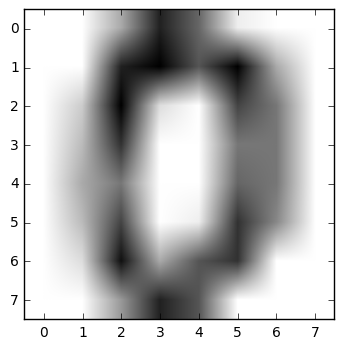

In [7]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [8]:
from sklearn.model_selection import train_test_split
digits_data = digits.data / 16
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits.target, test_size=0.1)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1617, 64), (180, 64), (1617,), (180,))

In [10]:
X_train[:1]

array([[ 0.    ,  0.    ,  0.4375,  1.    ,  1.    ,  1.    ,  0.8125,
         0.    ,  0.    ,  0.    ,  0.5   ,  0.5625,  0.5   ,  0.9375,
         0.9375,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.25  ,
         1.    ,  0.4375,  0.    ,  0.    ,  0.    ,  0.25  ,  0.5   ,
         0.75  ,  1.    ,  0.3125,  0.    ,  0.    ,  0.1875,  1.    ,
         1.    ,  1.    ,  0.875 ,  0.4375,  0.    ,  0.    ,  0.    ,
         0.1875,  0.5   ,  1.    ,  0.1875,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.9375,  0.8125,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.4375,  1.    ,  0.1875,  0.    ,  0.    ,  0.    ]])

In [11]:
y_train[:3]

array([7, 4, 6])

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(n_values=10)
y_train_enc = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
y_train_enc[:3], y_train[:3]

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]]), array([7, 4, 6]))

In [13]:
from scipy.special import expit
expit(-1000)

0.0

In [14]:
1/(1 + np.exp(1000))

/Users/rickypark/anaconda/envs/ml-learn/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


0.0

In [15]:
class FCNeuron(object):

    def __init__(self):
        self._w1 = None    # 가중치 w1
        self._w2 = None    # 가중치 w2
        self._b1 = None    # 바이어스 b1
        self._b2 = None    # 바이어스 b2
        self._w1_grad = 0
        self._w2_grad = 0
        self._b1_grad = 0
        self._b2_grad = 0
        self._x = None     # 첫번째 뉴런 입력값 x
        self._t = None     # 두번째 뉴런 입력값 t

    def set_params(self, w, b):
        """가중치와 바이어스를 저장합니다."""
        self._w1, self._w2 = w[0], w[1]
        self._b1, self._b2 = b[0], b[1]

    def forpass(self, x):
        """정방향 수식 w * x + b 를 계산하고 결과를 리턴합니다."""
        self._x = x
        self._t = self._sigmoid(np.dot(self._x, self._w1) + self._b1)
        _y_hat = np.dot(self._t, self._w2) + self._b2
        return self._softmax(_y_hat)

    def backprop(self, err, lr=0.1):
        """에러를 입력받아 가중치와 바이어스의 변화율을 곱하고 평균을 낸 후 감쇠된 변경량을 저장합니다."""
        self._w2_grad = lr * np.dot(self._t.T, err) / self._x.shape[0]
        self._b2_grad = lr * np.average(err, axis=0)
        err2 = np.dot(err, self._w2.T)
        self._w1_grad = lr * np.dot(self._x.T, err2) / self._x.shape[0]
        self._b1_grad = lr * np.average(err2, axis=0)

    def update_grad(self, l2=0):
        """계산된 파라메타의 변경량을 업데이트하여 새로운 파라메타를 셋팅합니다."""
        w1 = self._w1 + self._w1_grad - l2 * self._w1
        w2 = self._w2 + self._w2_grad - l2 * self._w2
        b1 = self._b1 + self._b1_grad
        b2 = self._b2 + self._b2_grad
        self.set_params([w1, w2], [b1, b2])

    def fit(self, X, y, n_iter=10, lr=0.1, cost_check=False, l2=0):
        """정방향 계산을 하고 역방향으로 에러를 전파시키면서 모델을 최적화시킵니다."""
        cost = []
        for i in range(n_iter):
            y_hat = self.forpass(X)
            error = y - y_hat
            self.backprop(error, lr)
            self.update_grad(l2/y.shape[0])
            if cost_check:
                y_hat = np.clip(y_hat, 0.00001, 0.99999)
                cost.append(-np.sum(y * np.log(y_hat))/y.shape[0])
        return cost
    
    def predict(self, X):
        y_hat = self.forpass(X)
        return np.argmax(y_hat, axis=1)
    
    def _sigmoid(self, y_hat):
        return expit(y_hat)
    
    def _softmax(self, y_hat):
        tmp = y_hat - y_hat.max(axis=1).reshape(-1, 1)
        exp_tmp = np.exp(tmp)
        return exp_tmp / exp_tmp.sum(axis=1).reshape(-1, 1)

In [16]:
n4 = FCNeuron()

In [17]:
w1 = np.random.rand(64, 100)
b1 = np.random.rand(100)
w2 = np.random.rand(100, 10)
b2 = np.random.rand(10)
n4.set_params([w1, w2], [b1, b2])

In [18]:
costs = n4.fit(X_train, y_train_enc, 2000, 0.1, cost_check=True)

In [19]:
y_hat = n4.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_hat)

0.96111111111111114

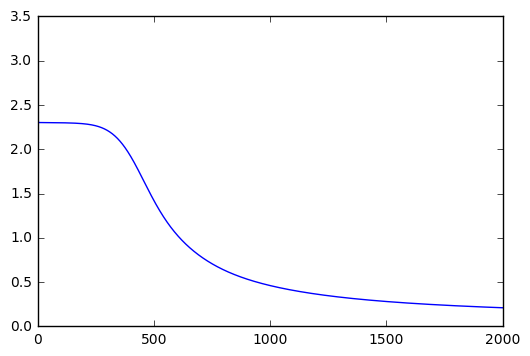

In [21]:
plt.plot(costs)

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp = MLPClassifier(solver='sgd', learning_rate_init=0.1, alpha=0, batch_size=1617,
                    activation='logistic', random_state=10, max_iter=2000,
                    hidden_layer_sizes=100, momentum=0)

In [24]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0, batch_size=1617, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.1, max_iter=2000, momentum=0,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
mlp.score(X_test, y_test)

0.96111111111111114